---
title: Regression
layout: collection
permalink: /Machine-Learning/Regression
collection: Machine-Learning
entries_layout: grid
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
  - machine-learning 
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from typing import Union

# Regression

---

We assume that there is a response value $y \in \mathbb{R}$ which comes from a noisy function with the observation $\mathbf{x} \in \mathbb{R}^n$:

$$
y = f(\mathbf{x}) + \eta
$$

Wo often use that f is a linear function, $f(\mathbf{x}) = \mathbf{w}^T \mathbf{x}$ and $\eta$ is a zero mean gaussian distribution with variance $\sigma^2$. With these assumptions we can write:

$$
p(y|\mathbf{x}) = \mathcal{N}(y|\mathbf{w}^T \mathbf{x}, \sigma^2)
$$

The model predicts a linear relationship between conditional expectation of observations $y_i$ and inputs $\mathbf{x}_i$:

$$
\mathbb{E} [ y_i | \mathbf{x}_i ] = \mathbf{w}^T \mathbf{x}_i = f(\mathbf{x}_i ; \mathbf{w})
$$

With this we can define the likelihood function, which is given by:

$$
L(\mathbf{w}) \propto \prod_i \exp \left[ - \frac{1}{2 \sigma^2} (y_i - \mathbf{w}^T \mathbf{x}_i)^2 \right]
$$

The likelihood can be seen as the probability of observing our data given our model $\mathbf{w}$. Logically, if we want the model which most accurately describes our data, we want to find $\mathbf{w}$ for which the Likelihood is maximised because:

$$
(y_i - \mathbf{w}^T \mathbf{x}_i)^2 > 0 \Rightarrow \exp \left[ - \frac{1}{2 \sigma^2} (y_i - \mathbf{w}^T \mathbf{x}_i)^2 \right] < 1 = \exp(0) \Leftarrow (y_i - \mathbf{w}^T \mathbf{x}_i)^2 = 0
$$

This we get:

$$
\hat{\mathbf{w}} = \arg \max_{\mathbf{w}} L(\mathbf{w}) = \arg \min_{\mathbf{w}} \left[ - L({\mathbf{w}}) \right] = \arg \min_{\mathbf{w}} \left[ - log(L({\mathbf{w}}) \right]
$$

Note: Because the logarithim is a monoton increasing function: $\arg \max f(x) = \arg \max \log(f(x))$

$$
\begin{align*}
\hat{\mathbf{w}} 
&= \arg \min_\mathbf{w} \sum_i (y_i - \mathbf{w}^T \mathbf{x}_i)^2 \\
&= \arg \min ||\mathbf{y} - X \mathbf{w} ||^2 \\
&= RSS(\mathbf{w})
\end{align*}
$$

To find this minima, we note that $f(x) = x^2$ is a convex function and we know $||v|| \geq 0 \forall \ v \ \in \mathbb{R}^d$. 
Thus we know there exist a definite and single minima to this function. 
To find this minima we take the derivative of the residual sum of squares, or RSS, in respect to $\mathbf{w}$

$$
\begin{align*}
\frac{\partial RSS(\mathbf{w})}{\partial \mathbf{w}}

= \frac{\partial}{\partial \mathbf{w}} ||\mathbf{y} - X \mathbf{w}||^2 = \frac{\partial}{\partial \mathbf{w}} (\mathbf{y} - X \mathbf{w})^T (\mathbf{y} - X \mathbf{w}) &= \frac{\partial}{\partial \mathbf{w}} \mathbf{y}^T \mathbf{y} - 2 \mathbf{y}^T X \mathbf{w} + \mathbf{w}^T X^T X \mathbf{w} \\
&= -2 X^T \mathbf{y} + 2 X^T X \mathbf{w}
\end{align*}
$$

$$
\Rightarrow -2 X^T \mathbf{y} + 2 X^T X \mathbf{w} = 0 \Leftrightarrow \hat{\mathbf{w}} = (X^T X)^{-1} X^T \mathbf{y}
$$

# Implementation:

---

### Data generator:

In [2]:
def data_generator(f, x: list, y: list) -> None:
  xi = 4 * (np.random.random() - 0.5)
  yi = np.random.normal(loc=f(xi), scale=0.5)
  x.append(xi)
  y.append(yi)

### Basis Expansion

In [3]:
def basis_expansion(x: Union[list, np.array], degree: int) -> np.array:
  basis = [[xi**k for k in range(degree + 1)] for xi in x]
  return np.array(basis)

### Optimal w

In [4]:
def RSS(X: np.array, y: np.array) -> np.array:
  w_opt = np.linalg.inv((X.T @ X)) @ X.T @ y
  return w_opt

### Visualization

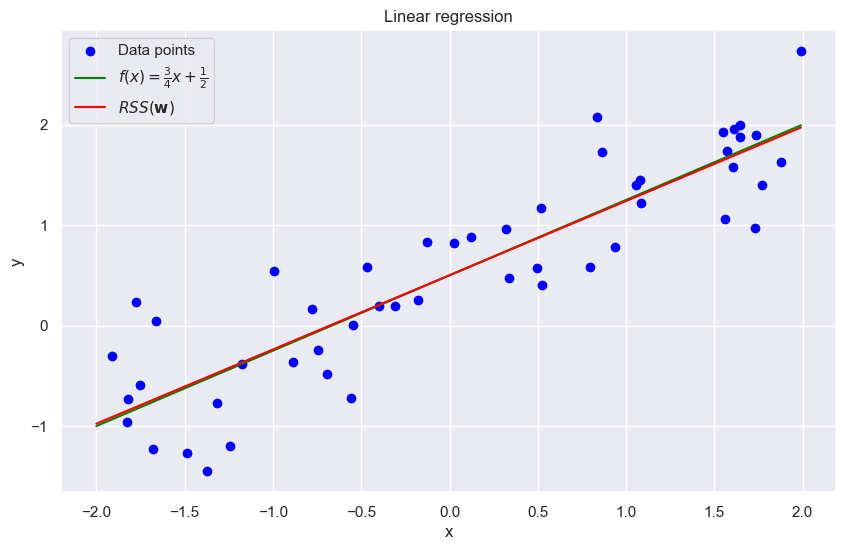

In [5]:
n = 50
x = []
y = []

x_range = np.arange(-2, 2, 0.01)
  
f = lambda x : 0.75 * x + 0.5

for i in range(n):
  data_generator(f, x, y)

x = basis_expansion(x, 1)
y = np.array(y)

w = RSS(x, y)
  
plt.figure(figsize=(10, 6))
plt.title('Linear regression')
plt.scatter(x[:, 1], y[:], label='Data points', color='blue')
plt.plot(x_range, f(x_range), label=r'$f(x) = \frac{3}{4}x + \frac{1}{2}$', color='green')
plt.plot(x_range, (w @ basis_expansion(x_range, 1).T)[:], label=r'$RSS(\mathbf{w})$', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show() 

 We can also use regression on non-linear functions like polynomes using a basis expansion

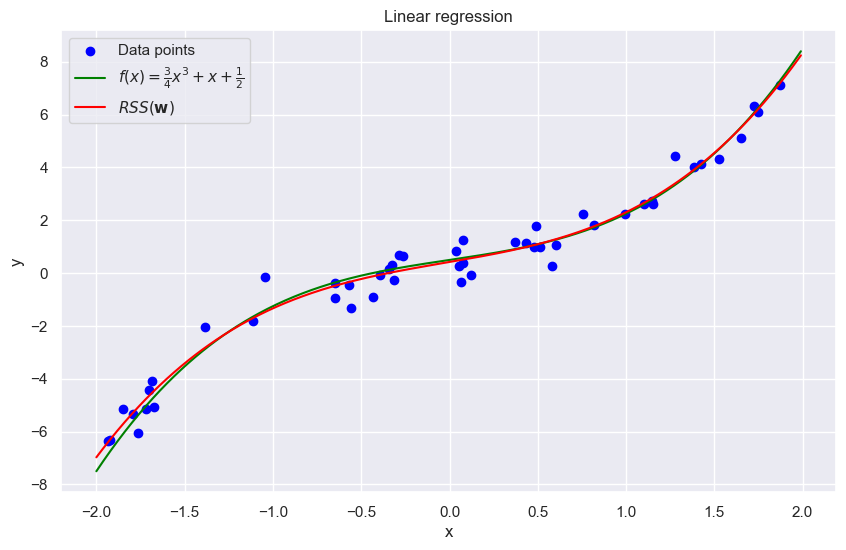

In [6]:
n = 50
x = []
y = []

x_range = np.arange(-2, 2, 0.01)
  
f = lambda x : 0.75 * x**3 + x + 0.5

for i in range(n):
  data_generator(f, x, y)
  
x = basis_expansion(x, 3)
y = np.array(y)

w = RSS(x, y)
  
plt.figure(figsize=(10, 6))
plt.title('Linear regression')
plt.scatter(x[:, 1], y[:], label='Data points', color='blue')
plt.plot(x_range, f(x_range), label=r'$f(x) = \frac{3}{4}x^3 + x + \frac{1}{2}$', color='green')
plt.plot(x_range, (w @ basis_expansion(x_range, 3).T)[:], label=r'$RSS(\mathbf{w})$', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show() 

We can also approximate more complex functions with polynomes

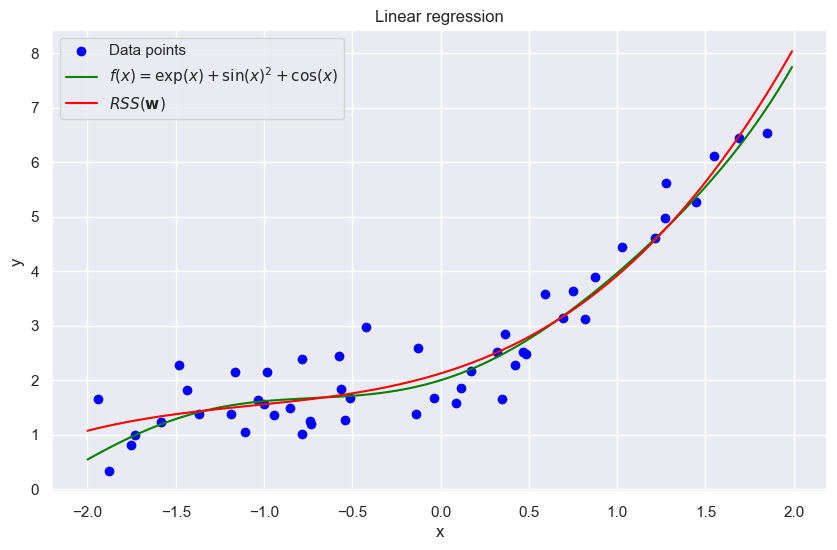

In [7]:
n = 50
x = []
y = []

x_range = np.arange(-2, 2, 0.01)

f = lambda x : np.exp(x) + np.sin(x)**2 + np.cos(x)

for i in range(n):
  data_generator(f, x, y)
  
xb = basis_expansion(x, 3)
yb = np.array(y)

w = RSS(xb, yb)
  
plt.figure(figsize=(10, 6))
plt.title('Linear regression')
plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x_range, f(x_range), label=r'$f(x) = \exp(x) + \sin(x)^2 + \cos(x)$', color='green')
plt.plot(x_range, (w @ basis_expansion(x_range, 3).T)[:], label=r'$RSS(\mathbf{w})$', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show() 

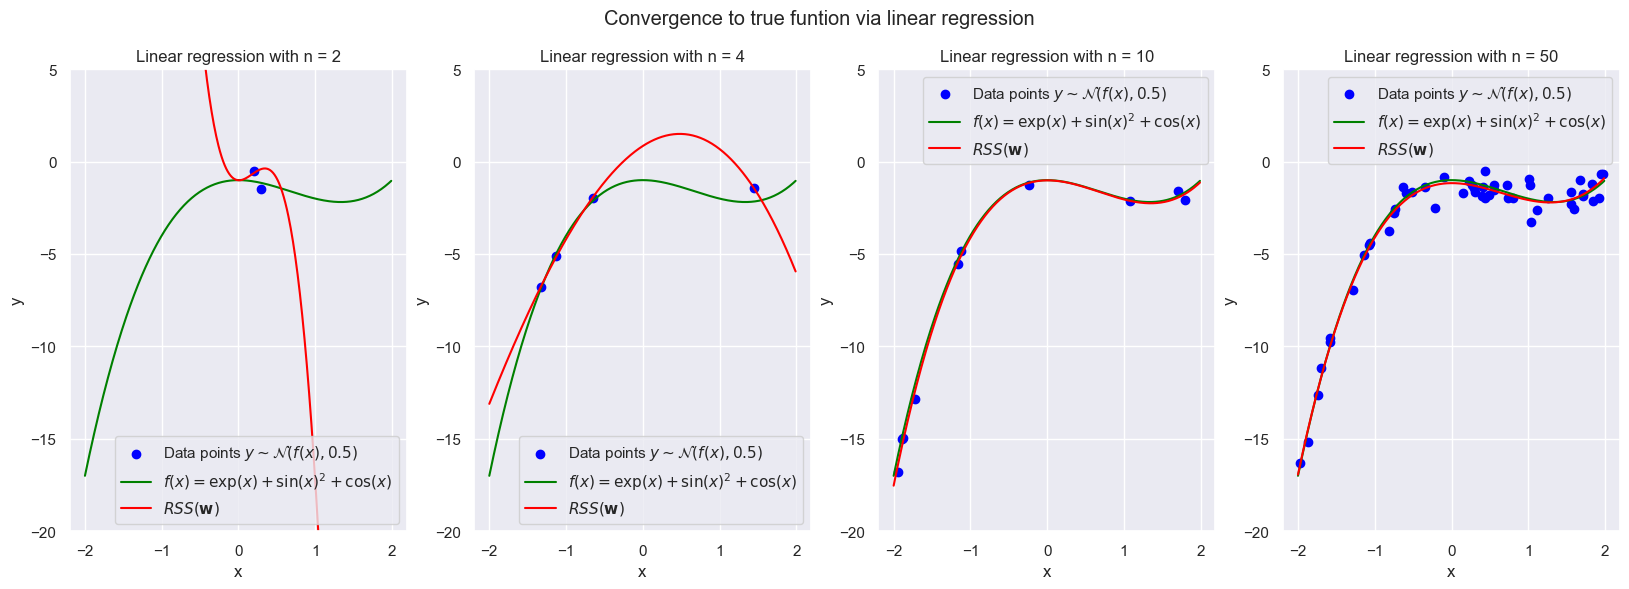

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
fig.figsize=(10, 6)
fig.suptitle('Convergence to true funtion via linear regression')
f = lambda x: x**3 - 2*x**2 - 1

amount_data_points = [2, 4, 10, 50]
for ax, data_points in zip(axs, amount_data_points):
  x = []
  y = []
  x_range = np.arange(-2, 2, 0.01)
  
  for i in range(data_points):
    data_generator(f, x, y)
    
  xb = basis_expansion(x, 3)
  yb = np.array(y)
  
  w = RSS(xb, yb)
  ax.set_title(f'Linear regression with n = {data_points}')
  ax.scatter(x, y, label=r'Data points $y \sim \mathcal{N}(f(x), 0.5)$', color='blue')
  ax.plot(x_range, f(x_range), label=r'$f(x) = \exp(x) + \sin(x)^2 + \cos(x)$', color='green')
  ax.plot(x_range, (w @ basis_expansion(x_range, 3).T)[:], label=r'$RSS(\mathbf{w})$', color='red')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_ylim([-20, 5])
  ax.legend()

## Frequentist confidence limits

With our optimal solution we can derive a confidence limit of our function ($\mathbf{\eta} \sim \mathcal{N}(0, \sigma^2 I_n)$):

$$
\begin{align*}
\hat{\mathbf{w}} 
&= (X^T X)^{-1} X^T \mathbf{y}  \\
&= (X^T X)^{-1} X^T (X \mathbf{w} + \mathbf{\eta}) \\
&= (X^T X)^{-1} X^T X \mathbf{w} + (X^T X)^{-1} X^T \mathbf{\eta} \\
&= \mathbf{w} + (X^T X)^{-1} X^T \mathbf{\eta} \\
\Rightarrow \hat{\mathbf{w}} - \mathbf{w} &= (X^T X)^{-1} X^T \mathbf{\eta} \\
\Rightarrow \hat{\mathbf{w}} - \mathbf{w} | X, \sigma^2 &\sim \mathcal{N}(0, \sigma^2 (X^T X)^{-1})
\end{align*}
$$

So basically, the error of our estimation of the true $\mathbf{w}$ is gaussian distributed with mean 0 and variance $\sigma^2 (X^T X)^{-1}$ with this we can then derive our condfidence intervalls. For the k-th component of $\mathbf{w}$ with $S = (X^T X)^{-1}$ we get:

$$
\hat{w_k} - w_k \sim \mathcal{N}(0, \sigma^2 S^{kk}) \Leftrightarrow \frac{\hat{w}_k - w_k}{\sqrt{\sigma^2 S^{kk}}} = z_k \sim \mathcal{N}(0, 1) 
$$

$$
\mathbb{P}(z_k < k_c) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{k_c} e^{\frac{t^2}{2}} dt = \Phi(k_c) = 1 - c
$$

The Lower and upper limits are then given by:

$$
\begin{align*}
\mathbb{P}(- z_k < k_c) 
&=
\mathbb{P}(- z_k \sqrt{\sigma^2 S^{kk}} < k_c \sqrt{\sigma^2 S^{kk}}) \\
&=
\mathbb{P}((w_k - \hat{w}_k) < k_c \sqrt{\sigma^2 S^{kk}}) \\
&=
\mathbb{P}( w_k < k_c \sqrt{\sigma^2 S^{kk}} + \hat{w}_k) \\
&=
\mathbb{P}( w_k < k_c \sqrt{\sigma^2 S^{kk}} + \hat{w}_k) 
\end{align*}
$$

And 

$$
\begin{align*}
\mathbb{P}(z_k < k_c) 
&=
\mathbb{P}(z_k \sqrt{\sigma^2 S^{kk}} < k_c \sqrt{\sigma^2 S^{kk}}) \\
&=
\mathbb{P}((\hat{w}_k - w_k) < k_c \sqrt{\sigma^2 S^{kk}}) \\
&=
\mathbb{P}( - w_k < k_c \sqrt{\sigma^2 S^{kk}} - \hat{w}_k) \\
&=
\mathbb{P}( w_k < \hat{w}_k - k_c \sqrt{\sigma^2 S^{kk}}) 
\end{align*}
$$

### Standard parametric rate

Assume we have $n$ samples, we denote $\hat{\mathbf{w}}$ our estimate on $n$ samples and $\mathbf{w}$ our true parameters, then:

$$
\begin{align*}
\hat{\mathbf{w}}_n - \mathbf{w} &\sim \mathcal{N}(0, \sigma^2 (X^T X)^{-1}) \\
&=
\mathcal{N}(0, \sigma^2 (X^T X \frac{1}{n})^{-1} \frac{1}{n}) \\
\sqrt{n}(\hat{\mathbf{w}}_n - \mathbf{w}) &\sim  \mathcal{N}(0, \sigma^2 (X^T X \frac{1}{n})^{-1})
\end{align*}
$$

Because $\lim_{n \rightarrow \infty} X^T X \frac{1}{n} = \Sigma$, the true covariance matrix. 
Because the covariance matrix is a constant, the whole right side becomes a constant distribution, then by this $\hat{\mathbf{w}} - \mathbf{w} \rightarrow 0$. This means that $\hat{\mathbf{w}}$ converges to the true $\mathbf{w}$ at a rate of $\sqrt{n}$. This converge follows from the central limit theorem that $\sqrt{n}(\bar{X} - \mu) \sim \mathcal{N}(0, \sigma^2)$ for $n \rightarrow \infty$. The fraction $\frac{1}{\sqrt{n}}$ then can be seen as the magnitude of the estimation error.


### Basis functions

The usage of basis functions allows for the regression of non-linear functions, creating in the end a so called additive model, where we predict the value by the sum of many seperate components.

$$
\mathbb{P}(y | \mathbf{x}) = \mathcal{N}(\mathbf{w}^T \phi(\mathbf{x}), \sigma^2)
$$

A special basis function is the so called ***radial basis functions***:

$$
g_k(\mathbf{x}) = \exp\left(- \frac{1}{2\sigma^2} || \mathbf{x} - \mathbf{x}_k ||^2 \right)
$$

Which measures the similarity between the new sample $\mathbf{x}$ and a the so called prototypes $\mathbf{x}_k$.

### Overfitting

Looking at polynomial regression with a high polynomial degree, within the training data we may achieve a zero training training error but have a large expected error. This is caused by an over adjusting of our model to the noise, causing the so called, overfitting. 

### Bayesian regression

In bayesian regression, instead of a definit point estimate $y$, we give it a probability distribution, where the mean is the point estimate, but with an extra noise. So our prediction of $y$ is a gaussian distribution signifying our uncertainty of predicting $y$ given the already observed data.

Given a datapoint $\mathbf{x} \in \mathbb{R}$, we want to map it to a real valued output $y_i$, where $y_i$ comes from a distribution.

$$
p(y| \mathbf{x}, \mathbf{w}, \sigma^2) = \mathcal{N}(y| \mathbf{w}^T \mathbf{x}, \sigma^2)
$$

We want to find a $\mathbf{w}$ which maximizes the probability of $y$ given $\mathbf{x}$. If we have our data $\mathcal{D} = \{ (\mathbf{x}_1, y_1), ..., (\mathbf{x}_n, y_n) \}$ the likelihood is given by:

$$
L(\mathbf{w}, \mathcal{D}) = \prod_{i=1}^n \mathcal{N}(y| \mathbf{w}^T \mathbf{x}_i, \sigma^2) \propto \exp \left(- \frac{1}{2 \sigma^2} ( y_i - \mathbf{w}^T \mathbf{x}_i)^2 \right)
$$

We keep all our possible $\mathbf{w}$, not only the one that maximizes $y_i$ like in the frequentist view. We then weigh these $\mathbf{w}$ by their posterior probability (posterior predictive distribution).

$$
p(y| \mathbf{x}, \mathcal{D}, \sigma^2) = \int p(y | \mathbf{x}, \mathbf{w}, \sigma^2) p(\mathbf{w} | \mathcal{D}, \sigma^2) d\mathbf{w}
$$

This integral can be seen as the averaging over all the models, multiplying the probability of $y$ given the probability of the model $\mathbf{w}$.

#### Posterior

For the posterior of $\mathbf{w}$ we specify our prior belief as:

$$
p(\mathbf{w}) = \mathcal{N}(\mathbf{w} | \mathbf{0}, \tau^{2} \mathbf{I})
$$

The posterior is then given by the bayes theorem:

$$
p(\mathbf{w} | \mathcal{D}, \sigma^2) \propto L(\mathbf{w}; \mathcal{D}) p(\mathbf{w})
$$

Where the posterior again is a gaussian distribution:

$$
p(\mathbf{w} | \mathcal{D}, \sigma^2) = \mathcal{N}(\mathbf{w} | \mathbf{w}_n, \mathbf{V}_n) = 
\mathcal{N} \left( \mathbf{w} | (X^T X + \frac{\sigma^2}{\tau^2} I)^{-1} X^T \mathbf{y}, \sigma^2 (X^T X + \frac{\sigma^2}{\tau^2} I)^{-1} \right) \\
$$

Proof:
$$
\begin{align*}
    p(\mathbf{w} | \mathcal{D}, \sigma^2) & \propto L(\mathbf{w}; \mathcal{D}) p(\mathbf{w}) \\
    &= \exp \left(- \frac{1}{2 \sigma^2} ( y_i - \mathbf{w}^T \mathbf{x}_i)^2 \right) \exp \left( -\frac{1}{2 \tau^2} \mathbf{w}^T \mathbf{w}\right) \\
    &= \exp \left(- \frac{1}{2 \sigma^2} (y - X \mathbf{w})^T (y - X \mathbf{w}) \right) \exp \left( -\frac{1}{2 \tau^2} \mathbf{w}^T \mathbf{w}\right) \\
    &= \exp \left(- \frac{1}{2 \sigma^2} (y - X \mathbf{w})^T (y - X \mathbf{w}) -\frac{1}{2 \tau^2} \mathbf{w}^T \mathbf{w}\right) \\
    &\propto \exp \left(- \frac{1}{\sigma^2} ( y^T y - 2 y^T X \mathbf{w} + \mathbf{w}^T X^T X \mathbf{w} ) -\frac{1}{\tau^2} \mathbf{w}^T \mathbf{w}\right) \\
    &= \exp \left(- \frac{1}{\sigma^2} y^T y + \frac{1}{\sigma^2} 2 y^T X \mathbf{w} -\frac{1}{\sigma^2} \mathbf{w}^T X^T X \mathbf{w} ) -\frac{1}{\tau^2} \mathbf{w}^T \mathbf{w}\right) \\
    &=\exp \left(- \frac{1}{\sigma^2} y^T y + \frac{2}{\sigma^2}  y^T X \mathbf{w} - \mathbf{w}^T \underbrace{( \frac{1}{\sigma^2} X^T X + \frac{1}{\tau^2})}_{\Sigma} \mathbf{w} \right)  \\
\end{align*}
$$

As mentioned before the prediction of $y$ for a new $\mathbf{x}$ is given by the posterior predictive distribution

$$
\begin{align*}
\mathbb{P}(y | \mathbf{x}, \mathcal{D}, \sigma^2) 
&= 
\int \mathbb{P}(y | \mathbf{x}, \mathbf{w}, \sigma^2) \mathbb{P}(\mathbf{w} | \mathcal{D}, \sigma^2) d\mathbf{w} \\
&=
\int \mathcal{N}(y| \mathbf{w}^T \mathbf{x}, \sigma^2) \mathcal{N}(\mathbf{w} | \mathbf{w}_n, \mathbf{V}_n) d\mathbf{w} \\
&=
\mathcal{N}(y | \mathbf{w}_n^T \mathbf{x}, \sigma^2 + \mathbf{x}^T V_n \mathbf{x})
\end{align*}
$$

The variance of this distribution then depends on
1. The variance of the observations
2. The variance in the parameters $V_n$
    - The variance depends on how close the new sample $\mathbf{x}$ is to the training data $\mathcal{D}$

because the variance depends on our approximity to our data points, the closer we are to our data points, the more confident our predictions becomes. The further we move away, the larger the uncertainty is and the larger the error becomes $\rightarrow$ The distribution moving further away from our data broadens. 
By contrast, using only the $MLE$-parameter we get 

$$
\mathbb{P}(y | \mathbf{x}, \mathcal{D}, \sigma^2) \approx \int \mathbb{P}(y |\mathbf{x}, \mathbf{w}, \sigma^2) \delta_{\hat{\mathbf{w}}}(\mathbf{w})d\mathbf{w} 
= 
\mathbb{P}(y | \mathbf{x}, \hat{\mathbf{w}}, \sigma^2) = \mathcal{N}(y | \mathbf{x}^T \hat{\mathbf{w}}, \sigma^2)
$$

Because we now keep all models, there exist a family of models for which the data can be explained, creating the distribution.

The MAP estimate is given by 

$$
\begin{align*}
\mathbf{w}_{MAP} 
&=
-\arg \min_{\mathbf{w}} \{ \log L(\mathbf{w};\mathcal{D}) + \log \mathbb{P}(\mathbf{w}) \} \\
&=
\arg \min_{\mathbf{w}} \{ \frac{1}{2\sigma^2} \sum_i (y_i - \mathbf{w}^T \mathbf{x})  + \frac{1}{2\tau^2} \mathbf{w}^T \mathbf{w} \} \\
&=
\arg \min_{\mathbf{w}} \{\sum_i (y_i - \mathbf{w}^T \mathbf{x})  + \frac{\sigma^2}{\tau^2} \mathbf{w}^T \mathbf{w} \} \\
\end{align*}
$$

This is called ***ridge regression***. The first term describes the quality of the estimation, or 'fit', while the second term works as a penalty factor for high-value parameter values, as these high-value's are often the cause to overfitting. The solution can easily be calculated as the first term is the sum of convex functions, the positive quadratic functions, and the penalty is just a shift of the functions, making the whole expression a convex function with a isolated minima. Therefor we could find this minima by taking the derivative and setting it to zero.

### Model family

Looking again at bayesian regression but more broader, where our model $\mathbf{w}$ comes from a model family $\mathcal{F}$. While the likelihood is the same, prior is now 

$$
\mathbb{P}(\mathbf{w} | \mathcal{F}) = \mathcal{N}(\mathbf{w} |0, \tau^2 I)
$$

The posterior then becomes

$$
\mathbb{P}(\mathbf{w} | \mathcal{D}, \sigma^2) = \frac{\mathbb{P}(\mathbf{y} | \mathbf{w}, X)\mathbb{P}(\mathbf{w} |\mathcal{F})}{\mathbb{P}(\mathbf{y} | \mathcal{F}, X)}
$$

The evidence a.k.a the marginal likelihood here depends on the model Family, but not the parameter values of a specific model in the family. 
From the different model families, wenwant then be able to choose the onse with the highest probability, a.k.a pick $\mathcal{F}_i$ if $\mathbb{P}(\mathbf{y} | \mathcal{F_i}, X) > \mathbb{P}(\mathbf{y} | \mathcal{F_j}, X) \forall j$, thus picking the family with the highest marginal likelihood (Bayesian score).

### Laplace's Method

Assume we have a unnormalized density $\mathbb{P}^*(\theta)$ which has it's maximum at $\hat{\theta}$. If we take the logarithmic taylor expansion around $\hat{\theta}$ and take only the first terms:

$$
\begin{align*}
\ln \mathbb{P}^*(\theta) 
&\approx 
\ln \mathbb{P}^*(\hat{\theta}) +  \frac{d}{d\theta} \ln \mathbb{P}^*(\theta) \Bigr|_{\theta=\hat{\theta}} (\theta - \hat{\theta}) + \frac{1}{2}\frac{d^2}{d\theta^2} \ln \mathbb{P}^*(\theta) \Bigr|_{\theta=\hat{\theta}} (\theta - \hat{\theta})^2 + ... \\
&\approx
\ln \mathbb{P}^*(\hat{\theta}) - \frac{c}{2}(\theta - \hat{\theta})^2 \\
\Rightarrow Q^*(\theta) &= \mathbb{P}^*(\hat{\theta}) \exp \left[ - \frac{c}{2}(\theta - \hat{\theta})^2 \right]
\end{align*}
$$

Thus we get the approximation of the integral:

$$
Z = \int Q^*(\theta)d\theta = p^*(\hat{\theta})\int \exp \left[ - \frac{c}{2}(\theta - \hat{\theta})^2 \right] = p^*(\hat{\theta}) \sqrt{\frac{2\pi}{c}}
$$

This method can be generalized to multivariate distributions, where $H$ is the hessian matrix with $H_{ij} = \frac{d^2 \ln p^*(\mathbf{\theta})}{d \theta_i d \theta_j} \Bigr|_{\mathbf{\theta} = \hat{\mathbf{\theta}}}$. 
The normalisation factor is given by:

$$
\begin{align*}
Z 
&\approx 
p^*(\mathbf{\theta})\int \exp \left[- \frac{1}{2}(\mathbf{\theta} - \mathbf{\hat{\theta}})^T H (\mathbf{\theta} - \mathbf{\hat{\theta}})  \right] d\mathbf{\theta} \\
&= 
p^*(\mathbf{\theta}) \sqrt{\frac{(2\pi)^3}{|H|}} \\
&=
p^*(\mathbf{\theta}) \left| \frac{H}{2\pi}  \right|^{-\frac{1}{2}}\\
\end{align*}
$$

Thus we we're able to approximate $\mathbb{P}(\mathbf{\theta})$ by a gaussian centered at the mode ($\mathbf{\hat{\theta}}$) of $\mathbb{P}(\mathbf{\theta})$

$$
\mathbb{P}(\mathbf{\theta}) \approx \mathcal{N}(\mathbf{\theta} | \mathbf{\hat{\theta}}, H^{-1})
$$

### Bayesian Information Criterion (BIC)

Often the marginal likelihood is difficult or impossible to calculate, to still calculate the most likely family we use the laplace approximation which leads to the BIC score.

$$
\begin{align*}
\mathbb{P}(\mathcal{D} | \mathcal{F}) 
&= 
\int \mathbb{p}(\mathcal{D} |\mathbf{w}) \mathbb{P}(\mathbf{w} | \mathcal{F}) d\mathbf{w}  \\
&=
\mathbb{P}(\mathcal{D} | \mathbf{w}^*) \mathbb{P}(\mathbf{w}^* | \mathcal{F}) |H/(2\pi)|^{-\frac{1}{2}} \\
& \overset{\text{flat prior}}{\approx}
\mathbb{P}(\mathcal{D} | \mathbf{\hat{w}}) |H/(2\pi)|^{-\frac{1}{2}} \\
\Rightarrow \log \mathbb{P}(\mathcal{D} | \mathcal{F})
&=
\log \mathbb{P}(\mathcal{D} | \mathbf{\hat{w}}) - \frac{1}{2} \log |H| + C
\end{align*}
$$

If we focus on the hessian. $H = \sum_{i=1}^{n}H_i$ with $H_i = \nabla_{\mathbf{w}} \nabla_{\mathbf{w}} \log \mathbb{P}(\mathcal{D}_i | \mathbf{w})$. 
We can approximate each $H_i$ with a fixed matrix $H'$, $\log|H| = \log |nH| = \log (n^d |H'|) = d\log n + \log |H'|$. 
Thus we get

$$
\text{BIC}(\mathcal{F}, n | \mathcal{D}) := \log \mathbb{P}(\mathcal{D} | \mathbf{\hat{w}}) - \frac{d}{2}\log n \approx \log \mathbb{P}(\mathcal{D} | \mathcal{F}) + C'
$$

The intuition behind the BIC comes from the ***Shannon information content*** which measures the amount of surprise of a specific outcome a of a random experiment

$$
h(a) = -\log_2 \mathbb{P}(a)
$$

With this functions, an event with 100% probability holds no surprise ($h(a) = -\log_2 1 = 0$) and the less likely an event is, the higher the surpise.

In information theory, there exist functions / codes such that the number of bits to encode each symbol $a\in \mathcal{A}$ is essentially $-\log_2 \mathbb{P}(a)$. 
Symbols with higher probability require fewer bits, while symbols with lower probability require more bits, which aligns with our intuition that we should spend fewer resources (bits) on more common events and more resources on less common events to achieve efficient encoding. 

The BIC then can be thought of as the sum of surprises, meaning that the sum of surprises of all observations is the description length of the observations given the most probable model in $\mathcal{F}$.

$$
-\text{BIC}(\mathcal{F}, n | \mathcal{D}) = \sum_{i=1}^n \left( -log_2 \mathbb{P}(y_i | \mathbf{x}_i, \mathbf{\hat{w}}) \right) + \frac{d}{2}\log_2 n
$$

For the second term $\frac{d}{2} \log_2 n$ is the description length of the model. 
Given our model $\mathbf{w}\in \mathbb{R}^d$, the standard parametric rate was given as 
$\sqrt{n}(\mathbf{\hat{w}}_n - \mathbf{w}) \sim \mathcal{N}(0,
\sigma^2 (X^T X \frac{1}{n})^{-1}), X^T X \frac{1}{n} \xrightarrow[]{n \rightarrow \infty} \Sigma$.
where $\frac{1}{\sqrt{n}}$ represents the magnitude of the estimation error.
Looking at the 1D case, because there always exist an estimation error of $\frac{1}{\sqrt{n}}$,
if we squash our $\mathbf{w}$ in the intervall [0, 1], there exist $\sqrt{n}$ levels to describe our model. 
In dimensions this just becomes a grid of $(\sqrt{n})^d$, thereby the number of bits to encode this grid is given by

$$
\log_2 ((\sqrt{d})^d) = \frac{d}{2}\log_2 n
$$

This we only need $\frac{d}{2}\log_2 n$ to encode $\ \mathbf{\hat{w}}$ with sufficient precision. This in total the BIC is the same as the sum of the description length of the data given the model plus the description length of the model itself

$$
-\text{BIC} = \text{DL(data | model)} + \text{DL(model)}
$$

Which means that if we maximize our BIC, we minimize our joint DL of the data and the model, this is the ***Minimum Description Length principle***.

### Sparse Models

Often we can have many more dimensions $d$ than we have training samples $n$, this gives a so called short and fat matrix $X$, where we have myn more columns than rows (small n large d problem). 
We then would like to ask, whats the smallest set of features that can accurately predict the response in order to prevent overfitting.
Let $\gamma_j = 1$ be, if the feature $j$ is relevant, and $\gamma_j = 0$ if not.
We then would like to calculate the probability of our model given the data and find the model which maximizes this probability

$$
\mathbb{P}(\mathbf{\gamma} | \mathcal{D}) \propto \mathbb{P}(\mathcal{D} | \mathbf{\gamma}) \mathbb{P}(\mathbf{\gamma})
$$

We choose the MAP estimate $\mathbf{\hat{\gamma}} = \arg \max_{\mathbf{\gamma}} \mathbb{P}(\mathbf{\gamma} | \mathcal{D})$. Because we have $2^d$ possible models, it is often impossible to calculate the full posterior for large models. 
Looking at the prior, because we only have two states of $\gamma_j$, we have:

$$
\mathbb{P}(\mathbf{\gamma}) = \prod^{d}_{j=1} \text{Ber}(\gamma_j | \pi_0) = \pi_0^{||\gamma||_0} (1 - \pi_0)^{d - ||\gamma||_0}
\Leftrightarrow
\log \mathbb{P}(\mathbf{\gamma} | \pi_0) = - \lambda ||\mathbf{\gamma}||_0 + const
$$

Where $\pi_0$ is the probability that a feature is relevant and $||\gamma||\_0 = \sum_{i=1}^d \gamma_i$ is the $\mathcal{l}_0$ pseudo norm, which counts the non-zero elements in the vector and $\lambda = \log \frac{1 - \pi_0}{\pi}$ which controls the sparsity of the model.
We can write the marginal likelihood as 

$$
\mathbb{P}(\mathcal{D} | \mathbf{\gamma}) 
= 
\mathbb{P}(\mathbf{y} | X, \mathbf{\gamma}) = \int \mathbb{P}(\mathbf{y} | X, \mathbf{w}, \mathbf{\gamma}) \mathbb{P}(\mathbf{w} | \mathbf{\gamma}) d\mathbf{w}
$$

Then for $\mathbb{P}(\mathbf{w} | \mathbf{\gamma})$, if $\gamma_j = 0$ then $w_j = 0$.
 If we assign a gaussian to the non-zero components with $\sigma^2_w$, which reflects our expectation of the coefficients associated with the relevant variables. 
 Thus we get the total distribution as:

$$
\mathbb{P}(w_j | \gamma_j) 
=
\begin{cases}
\delta_0(w_j) \quad \text{if} \ \gamma_j = 0 \\
\mathcal{N}(w_j | 0, \sigma^2_w) \quad \text{else}
\end{cases}
$$

Then for $\sigma^2_w \rightarrow \infty$ for $\mathbb{P}(w_j | \gamma_j = 1)$ we get a uniform distribution (spike slab model). 
With the dirac function, we assign the total probability to zero coefficient variables and our non zero coefficient variables are gaussian distributed. 
We approximate the likelihood by the BIC

$$
\begin{align*}
\log \mathbb{P}(\mathcal{D} | \mathbf{\gamma}) 
&=
\int \mathbb{P}(\mathbf{y} | X, \mathbf{w}, \mathbf{\gamma})\mathbb{P}(\mathbf{w} | \mathbf{\gamma}) d \mathbf{w} \\
&\approx 
\log \mathbb{P}(\mathbf{y} | X, \mathbf{\hat{w}}_{\gamma}) - \frac{1}{2}||\hat{\mathbf{w}}_{\gamma}||_0 \log n
\end{align*}
$$

Where $\mathbf{\hat{w}}_{\gamma}$ is the ML estimate. Thus we want to find $\mathbf{\hat{w}}$ which minimizes the negativ log likelihood under the $l_0$ penalty

$$
\min_{\mathbf{w}} \left[ - \log \mathbb{P}(\mathbf{y} | X, \mathbf{w}) + \lambda || \mathbf{w}||_0 \right]
$$

The problem is that the $l_0$ is a high non-convex function, which makes minimization by taking the derivative impossible. The idea is to replace the discrete variables prior with continuous ones. We choose the laplace distribution which still encourages the placement of alot of probability density near zero ($w_j = 0$):

$$
\mathbb{P}(\mathbf{w} | \lambda) = \prod_{j=1}^d Lap(w_j | 0, \frac{1}{\lambda}) \propto \prod_{j=1}^{d} \exp(- \lambda |w_j|)
$$

Using then the MAP estimation with this prior we get:

$$
f(\mathbf{w}) = - \log \mathbb{P}(\mathcal{D} | \mathbf{w}) - \log \mathbb{P}(\mathbf{w} | \lambda) = NLL(\mathbf{w}) + \lambda||\mathbf{w}||_1
$$

This is the ***lasso regression*** (least absolute shrinkage and selection operator), which can be seen as the convex approximation of the $l_0$ norm. 
This type of regression forces $\mathbf{\hat{w}}$ to be sparse and the degree of sparsity depends on $\lambda$. Because $||\mathbf{w}||_1$ is not differentiable at zero, we use the so called subderivative or subgradient which is defined as 

$$
f(x) - f(x_0) \geq c(x - x_0)
$$

The subderivative of the residual of sum of squares is given by 

$$
\begin{align*}
    \frac{\partial }{\partial w_j} RSS(\mathbf{w}) 
    &= 
    \frac{\partial }{\partial w_j} ||\mathbf{y} - X\mathbf{w}||^2 \\
    &= 
    -2x^T_j (\mathbf{y} - X\mathbf{w}) \\
    &=
    -2x^T_j (\mathbf{y} - X_{-j}\mathbf{w}_{-j} - X_{j}w_{j}) \\
    &=
    2x^T_j X_{j}w_{j} - 2x^T_j (\mathbf{y} - X_{-j}\mathbf{w}_{-j}) \\
    &=
    2 \sum_{i=1}^n x_{ij}^2 w_j - 2\sum_{i=1}^n x_{ij} (y_i - \mathbf{w}^T_{-j}\mathbf{x}_{i,-j}) \\
    &=
    a_j w_j - c_j
\end{align*}
$$

The $c_j$ term is proportional to the correlation between the j'th feature $\mathbf{x}_{-,j}$ and the residual due to other features:

$$
c_j \propto \mathbf{x}_{.,j} \mathbf{r}_{-j} \quad \text{with} \quad \mathbf{r}_{-j} = \mathbf{y} - X_{-j} \mathbf{w}_{-j}
$$

Because in linear regression, the $\mathbf{r}$ - residual is orthogonal to every input feature, the magnitude of $c_j$ indicates how relevant feature $j$ is, relative to all other features. 
The residual vectors represents the difference between the observed response values and the predicted values by the model. 
Then $\mathbf{r}\_{-j}$ represents the part of the response that is not explained by the remaining features, without $j$. 
The allignement of $\mathbf{x}\_j \mathbf{r}\_{-j}$ measures then the allignement between the two vectors. 
If they are highly alligned then the dot product is large, indicating that the feature $j$ is capturing information that is not explained by the other features. 
If the dot product is small that both vectors are not really alligned, meaning $\mathbf{x}_j$ holds information which is already captured by the other features. 
This is because, if the doct prodcut is high, both vectors are closely alligned and the $\mathbf{x}$ points in the direction of the error, thus the part which the other features are unable to explain. 
For the lasso regression we get the subderivative of 

$$
\partial_{w_j} f(\mathbf{w}) 
=
(a_j w_j - c_j) + \lambda \partial_{w_j}||\mathbf{w}||_1 
=
\begin{cases}
    \begin{align}
        a_j w_j - c_j - \lambda \quad &, \text{if } w_j < 0 \\
        [- c_j - \lambda, - c_j + \lambda] \quad &, \text{if } w_j = 0 \\
        a_j w_j - c_j + \lambda \quad &, \text{if } w_j > 0 
    \end{align}
\end{cases}
$$

The minima of this derivative, thus $\partial_{w_j} f(\mathbf{w}) = 0$ can happen at three different values, depending on the value of $w_j$ itself. 

$$
\hat{w}_j 
= 
\begin{cases}
    \begin{align*}
        \frac{c_j + \lambda}{a_j} \quad &, \text{if } c_j < - \lambda \\
        0 \quad &, \text{if } c_j \in [-\lambda, \lambda] \\
        \frac{c_j - \lambda}{a_j} \quad &, \text{if } c_j >  \lambda 
    \end{align*}
\end{cases}
$$

Which with the definition 
$\text{soft}(a ; \delta) = \text{sign}(a)(|a| - \delta)\_+$ and $x\_+ = \max(x, 0)$ 
can be rewritten as 

$$
\hat{w}_j = \text{soft}\left( \frac{c_j}{a_j}; \frac{\lambda}{a_j} \right)
$$

This is called soft thresholding, where with values in between $-\lambda \leq c_k \leq \lambda$, $w_k$ is set to zero and all values are shifted /shrinked. On the contrast, with hard thresholding, the values are also set to zero but the values outside the intervall aren't shrinked.

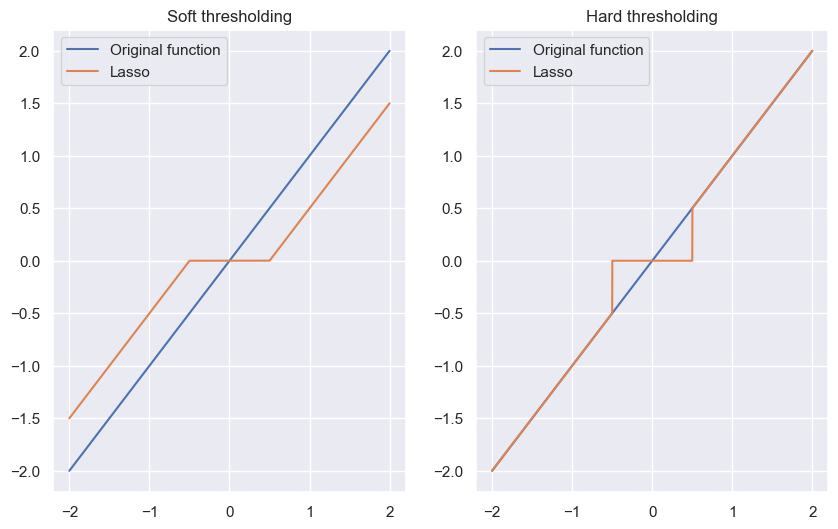

In [9]:
x = np.arange(-2, 2, 0.001)

bound = [-0.5, 0.5]

soft = [x_i if (x_i < bound[0] or x_i > bound[1]) else 0 for x_i in x]
soft = [x_i + 0.5 if x_i < bound[0] else x_i for x_i in soft]
soft = [x_i - 0.5 if x_i > bound[1] else x_i for x_i in soft]

hard = [x_i if (x_i < bound[0] or x_i > bound[1]) else 0 for x_i in x]

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].set_title('Soft thresholding')
axs[0].plot(x, x, label='Original function')
axs[0].plot(x, soft, label='Lasso')
axs[0].legend()

axs[1].set_title('Hard thresholding')
axs[1].plot(x, x, label='Original function')
axs[1].plot(x, hard, label='Lasso')
axs[1].legend();

### Lasso-Algorithms: Coordinate wise Descent

Often it is hard to optimize multiple variables simultaneously, but we can also optimize them one by one like so $\hat{w}_j = \arg \min_z f(\mathbf{w} + z \mathbf{e}_j$ where $\mathbf{e}_j$ is the $j$-th unit vector. Then we cycle through these component wise updates.